# Importing required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import math
import pickle

# DATA collection

In [3]:
# reading the csv file named as calories.csv
calories = pd.read_csv("calories.csv")

In [4]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [5]:
# reading the csv file named as exercise.csv
exercise_data = pd.read_csv("exercise.csv")

In [6]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [7]:
"""concatenating two separate files
    parameters:
    obj: seriez of dataframe objects
    axis: axis to concatenate along- 0 for row, 1 for column
"""
calories_data=pd.concat([exercise_data,calories['Calories']],axis=1)

In [8]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


# DATA processing

In [9]:
calories_data.shape

(15000, 9)

In [10]:
# display information about dataset
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [11]:
# checking if there are null values .isnull().sum() returns number of missing values in dataset
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [12]:
# checking for duplicate data entry
calories_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14995    False
14996    False
14997    False
14998    False
14999    False
Length: 15000, dtype: bool

# DATA analysis

In [13]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


# DATA visualization

<Axes: xlabel='Gender', ylabel='count'>

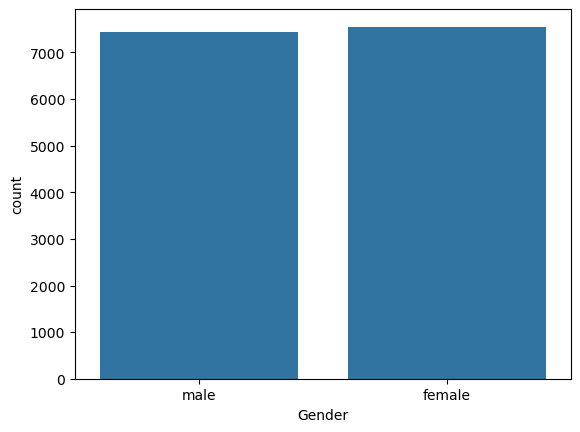

In [14]:
# display count of observation for a particular categorical value, Gender
sn.countplot(data= calories_data,x="Gender")

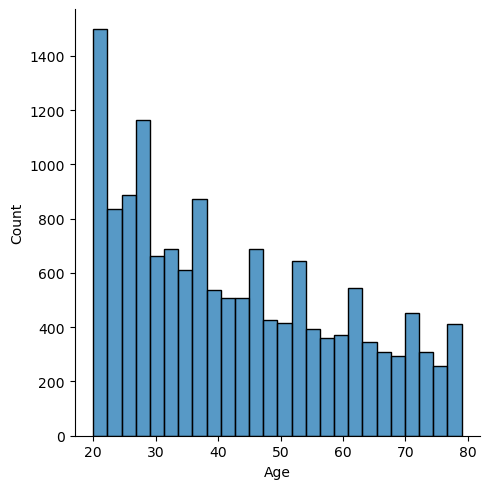

In [15]:
# display overall distribution of continuous variable, Age
sn.displot(calories_data['Age'])

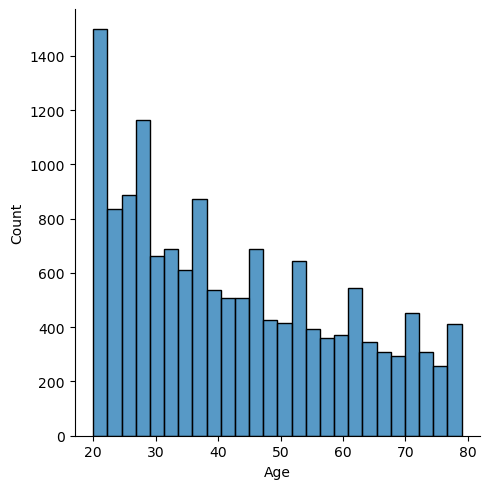

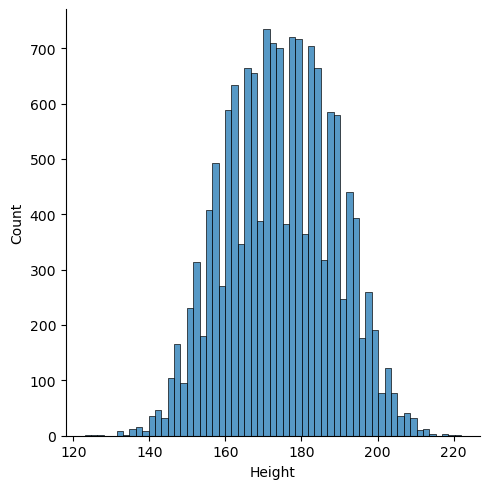

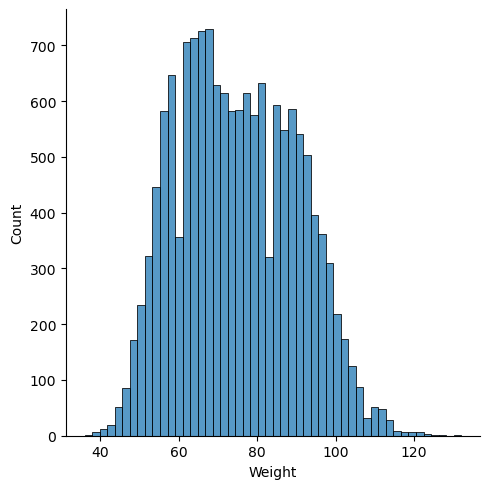

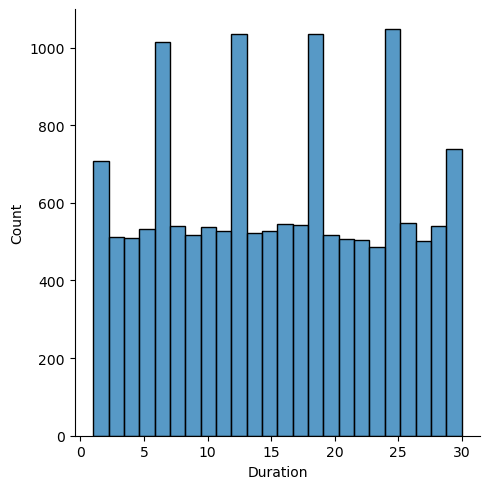

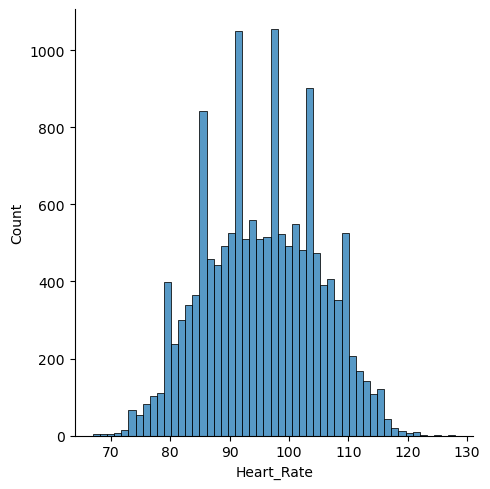

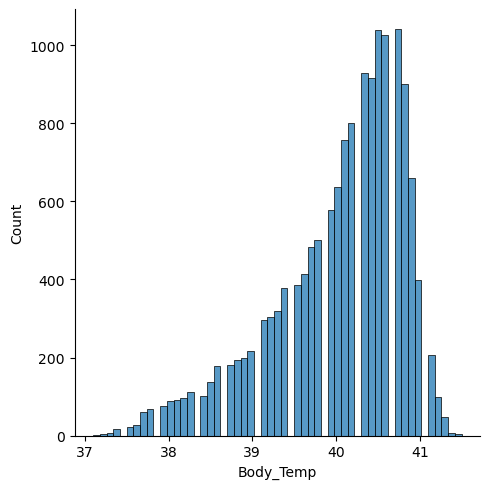

In [16]:
# distribution plot for all columns
for i in list(calories_data.columns[2:8]):
    sn.displot(calories_data[i])

# Finding correlation in dataset

In [17]:
# checking for correlation among numeric features 
correlation = calories_data.corr(numeric_only=True)

<Axes: >

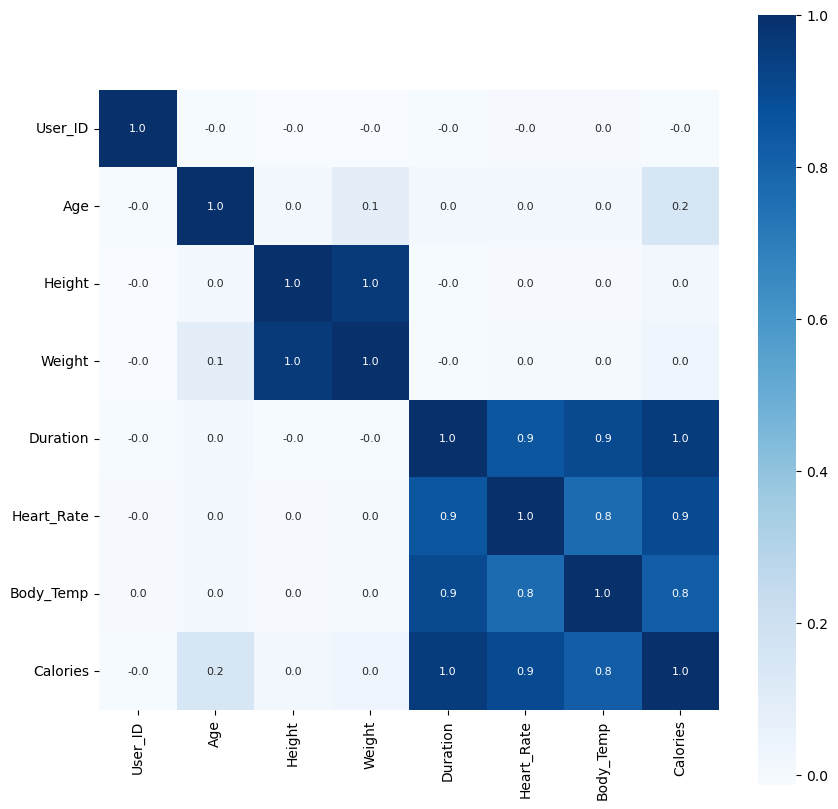

In [18]:
# forming correlation heatmap to represent correlation matrix among features
plt.figure(figsize=(10,10))
sn.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8},cmap='Blues')

# Converting text data to numerical value (encoding)

In [19]:
# replacing male category by numeric 0 and female by 1 
calories_data.replace({"Gender":{'male':0,'female':1}},regex=True,inplace=True)

C:\Users\ANIKET\AppData\Local\Temp\ipykernel_556\2759009943.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  calories_data.replace({"Gender":{'male':0,'female':1}},regex=True,inplace=True)


In [20]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


# Separating features and target

In [21]:
# User_ID is not required, hence dropped
X=calories_data.drop(columns=['User_ID','Calories'],axis=1)
Y=calories_data['Calories']

In [22]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           0   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           0   34   179.0    71.0      13.0       100.0       40.5
4           0   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       0   20   193.0    86.0      11.0        92.0       40.4
14996       0   27   165.0    65.0       6.0        85.0       39.2
14997       0   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [23]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


# Split DATA in training and test dataset

In [24]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=42)

In [25]:
X_train

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
9839,0,37,179.0,77.0,7.0,81.0,39.5
9680,0,23,195.0,87.0,26.0,110.0,40.5
7093,0,33,181.0,77.0,12.0,88.0,40.1
11293,0,66,156.0,54.0,9.0,77.0,39.5
820,0,32,144.0,49.0,5.0,90.0,39.0
...,...,...,...,...,...,...,...
5191,0,75,148.0,51.0,22.0,104.0,40.6
13418,0,21,172.0,67.0,20.0,104.0,40.7
5390,0,57,189.0,92.0,8.0,90.0,39.5
860,0,35,174.0,76.0,12.0,97.0,40.2


In [26]:
X_train.shape

(12000, 7)

In [27]:
Y_train

9839      17.0
9680     167.0
7093      40.0
11293     34.0
820       23.0
         ...  
5191     151.0
13418    114.0
5390      41.0
860       57.0
7270      59.0
Name: Calories, Length: 12000, dtype: float64

In [28]:
Y_train.shape

(12000,)

In [29]:
X_test

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
11499,0,45,154.0,52.0,26.0,107.0,40.6
6475,0,21,187.0,90.0,29.0,111.0,40.5
13167,0,58,176.0,77.0,11.0,90.0,40.0
862,0,35,182.0,89.0,24.0,108.0,40.8
5970,0,67,171.0,67.0,29.0,116.0,41.1
...,...,...,...,...,...,...,...
6216,0,61,166.0,66.0,28.0,106.0,41.0
3585,0,73,165.0,66.0,10.0,92.0,40.0
10023,0,38,169.0,66.0,20.0,104.0,40.2
14044,0,25,163.0,54.0,5.0,86.0,39.2


In [30]:
X_test.shape

(3000, 7)

In [31]:
Y_test

11499    173.0
6475     189.0
13167     53.0
862      161.0
5970     226.0
         ...  
6216     186.0
3585      53.0
10023    120.0
14044     20.0
12965    214.0
Name: Calories, Length: 3000, dtype: float64

In [32]:
Y_test.shape

(3000,)

# Model training

In [33]:
# xgboost regression
model = XGBRegressor()

In [34]:
# training
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

# Evaluation of model

In [35]:
# prediction using test data
test_data_prediction = model.predict(X_test)

In [36]:
test_data_prediction

array([174.78133 , 194.83058 ,  49.764797, ..., 122.98253 ,  18.55745 ,
       216.30232 ], dtype=float32)

In [37]:
# mean absolute error
print("mean absolute error:",metrics.mean_absolute_error(Y_test,test_data_prediction))

mean absolute error: 2.4750957059264183


In [38]:
# root mean squared error
print("root mean squared error:",math.sqrt(metrics.mean_squared_error(Y_test,test_data_prediction)))

root mean squared error: 4.256534631712837


Text(0.5, 1.0, 'EVALUATION OF MODEL')

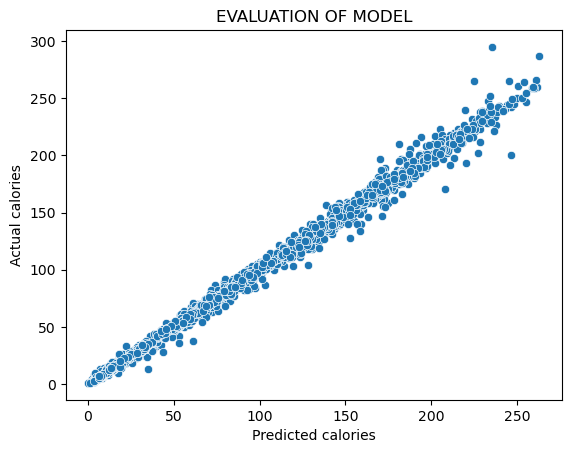

In [39]:
# forming scatter plot to check variation in actual value and predicted value
sn.scatterplot(x=test_data_prediction,y=Y_test)
plt.xlabel('Predicted calories')
plt.ylabel('Actual calories')
plt.title('EVALUATION OF MODEL')

<function matplotlib.pyplot.show(close=None, block=None)>

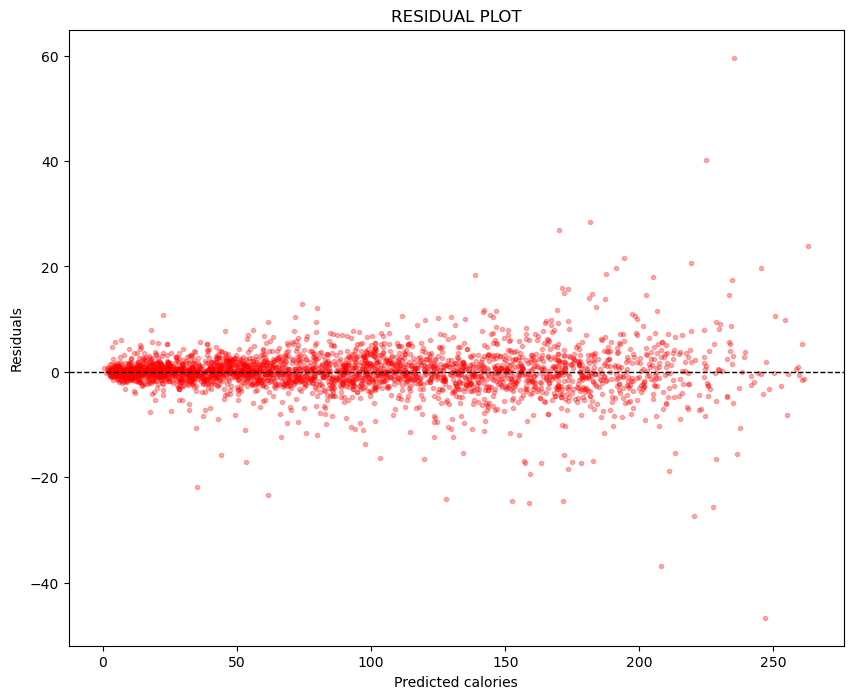

In [40]:
# residual analysis
plt.figure(figsize=(10,8))
plt.scatter(test_data_prediction,Y_test-test_data_prediction, color = 'red', alpha=0.3, marker = '.')
plt.xlabel('Predicted calories')
plt.ylabel('Residuals')
plt.title('RESIDUAL PLOT')
# adding a horizontal line spanning the whole or fraction of the axes
plt.axhline(y=0,color='k',linestyle='--',lw=1)
plt.show

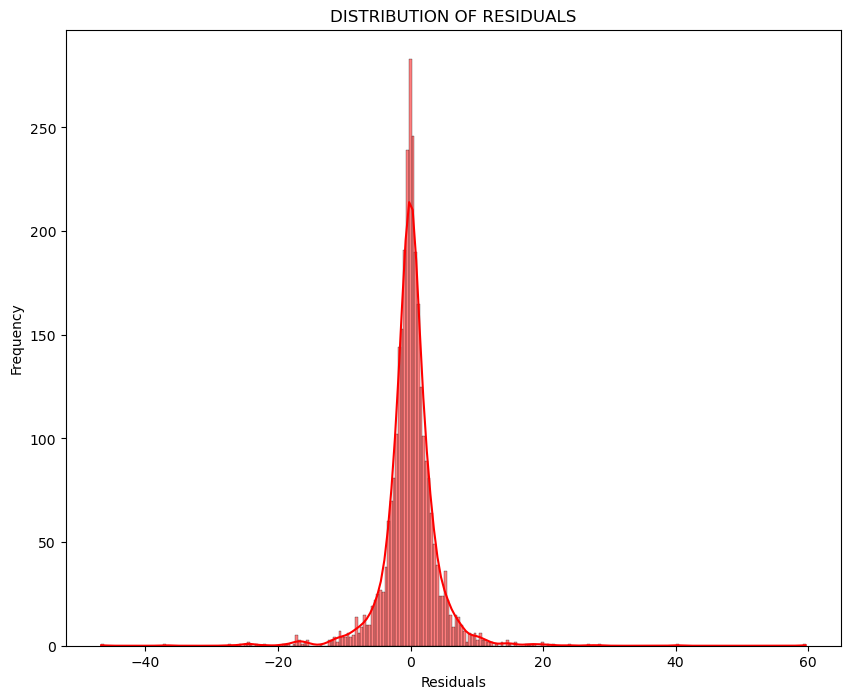

In [41]:
# distribution of residuals
plt.figure(figsize=(10,8))
sn.histplot(Y_test-test_data_prediction,kde=True,color='red')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('DISTRIBUTION OF RESIDUALS')
plt.show()

# Building a predictive system

In [42]:
# give any input as (gender, age, height, weight, duration, heart rate, body temperature)
input_data= (0, 27,	154, 58, 10, 81, 39.8)
input_data_to_array=np.asarray(input_data)
input_data_to_array.shape

(7,)

In [43]:
data = input_data_to_array.reshape(1,-1)

In [44]:
data.shape

(1, 7)

In [45]:
# making prediction on given data
prediction = model.predict(data)
prediction

array([35.53028], dtype=float32)

In [47]:
type(prediction)

numpy.ndarray

## Serializing using pickle

In [46]:
pickle.dump(model,open("prediction.pkl","wb"))